# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
cities

['jamestown',
 'airai',
 'verkh-chebula',
 'sarangani',
 'hobart',
 'arys',
 'mataura',
 'tuktoyaktuk',
 'moses lake',
 'rikitea',
 'pundaguitan',
 'bijie',
 'busselton',
 'sambava',
 'taolanaro',
 'hilo',
 'ushuaia',
 'mount gambier',
 'new norfolk',
 'beysehir',
 'kahului',
 'cidreira',
 'kurumkan',
 'alice springs',
 'thompson',
 'vaini',
 'hermanus',
 'saint-pierre',
 'labutta',
 'hithadhoo',
 'arraial do cabo',
 'seoul',
 'okhotsk',
 'nikolskoye',
 'nizhneangarsk',
 'ribeira grande',
 'saint-philippe',
 'mys shmidta',
 'sioux lookout',
 'constitucion',
 'tura',
 'rio gallegos',
 'nosy varika',
 'saskylakh',
 'te anau',
 'punta arenas',
 'umm kaddadah',
 'acapulco',
 'ambilobe',
 'katsuura',
 'port alfred',
 'qaanaaq',
 'sungai padi',
 'illoqqortoormiut',
 'qasigiannguit',
 'belaya gora',
 'meulaboh',
 'cape town',
 'isangel',
 'georgetown',
 'lebu',
 'kapaa',
 'xingcheng',
 'hambantota',
 'padang',
 'mahebourg',
 'methoni',
 'rocha',
 'sundargarh',
 'tual',
 'inirida',
 'port linc

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
temp_unit = 'imperial'
citynumb = 0
city_n = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date_w = []

for city in cities:
    url_query = (f"{url}appid={weather_api_key}&q={city}&units={temp_unit}")
    weather_response = requests.get(url_query)
    weather_json = weather_response.json()
    
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date_w.append(weather_json['dt'])
        city_n.append(city)
        citynumb += 1
        print(f"Processing Record {citynumb} of Set xx | {city}")
        
    except:
        print('City' + '\033[1m' + ' not ' + '\033[0m' + 'found. Skipping...')
        #pass

Processing Record 1 of Set xx | jamestown
Processing Record 2 of Set xx | airai
Processing Record 3 of Set xx | verkh-chebula
Processing Record 4 of Set xx | sarangani
Processing Record 5 of Set xx | hobart
Processing Record 6 of Set xx | arys
Processing Record 7 of Set xx | mataura
Processing Record 8 of Set xx | tuktoyaktuk
Processing Record 9 of Set xx | moses lake
Processing Record 10 of Set xx | rikitea
Processing Record 11 of Set xx | pundaguitan
Processing Record 12 of Set xx | bijie
Processing Record 13 of Set xx | busselton
Processing Record 14 of Set xx | sambava
City not found. Skipping...
Processing Record 15 of Set xx | hilo
Processing Record 16 of Set xx | ushuaia
Processing Record 17 of Set xx | mount gambier
Processing Record 18 of Set xx | new norfolk
Processing Record 19 of Set xx | beysehir
Processing Record 20 of Set xx | kahului
Processing Record 21 of Set xx | cidreira
Processing Record 22 of Set xx | kurumkan
Processing Record 23 of Set xx | alice springs
Process

Processing Record 182 of Set xx | alenquer
Processing Record 183 of Set xx | santa rosa
Processing Record 184 of Set xx | asau
Processing Record 185 of Set xx | lashio
Processing Record 186 of Set xx | college
Processing Record 187 of Set xx | lompoc
Processing Record 188 of Set xx | san quintin
Processing Record 189 of Set xx | vila velha
Processing Record 190 of Set xx | vallenar
Processing Record 191 of Set xx | vanavara
Processing Record 192 of Set xx | vitim
Processing Record 193 of Set xx | namibe
Processing Record 194 of Set xx | barra
Processing Record 195 of Set xx | kananga
Processing Record 196 of Set xx | pisco
Processing Record 197 of Set xx | fortuna
Processing Record 198 of Set xx | tasiilaq
Processing Record 199 of Set xx | kutum
Processing Record 200 of Set xx | lagoa
Processing Record 201 of Set xx | mandalgovi
Processing Record 202 of Set xx | petrovsk-zabaykalskiy
Processing Record 203 of Set xx | kysyl-syr
Processing Record 204 of Set xx | peniche
Processing Record

Processing Record 360 of Set xx | boende
Processing Record 361 of Set xx | khani
Processing Record 362 of Set xx | havre-saint-pierre
Processing Record 363 of Set xx | araouane
Processing Record 364 of Set xx | srirampur
Processing Record 365 of Set xx | comodoro rivadavia
Processing Record 366 of Set xx | bereda
Processing Record 367 of Set xx | ahipara
Processing Record 368 of Set xx | gorontalo
Processing Record 369 of Set xx | chegem
Processing Record 370 of Set xx | rantepao
Processing Record 371 of Set xx | la romana
Processing Record 372 of Set xx | pljevlja
Processing Record 373 of Set xx | shimoda
Processing Record 374 of Set xx | byron bay
Processing Record 375 of Set xx | banjar
Processing Record 376 of Set xx | hindaun
Processing Record 377 of Set xx | ocos
Processing Record 378 of Set xx | putina
Processing Record 379 of Set xx | necochea
Processing Record 380 of Set xx | dunmore town
Processing Record 381 of Set xx | tocopilla
Processing Record 382 of Set xx | santa catar

Processing Record 539 of Set xx | kuchera
Processing Record 540 of Set xx | zvishavane
Processing Record 541 of Set xx | lac-megantic
Processing Record 542 of Set xx | astoria
Processing Record 543 of Set xx | tianpeng
City not found. Skipping...
Processing Record 544 of Set xx | delta del tigre
Processing Record 545 of Set xx | zholymbet
Processing Record 546 of Set xx | maralal
Processing Record 547 of Set xx | roswell
Processing Record 548 of Set xx | bandarbeyla
Processing Record 549 of Set xx | visnes
Processing Record 550 of Set xx | nacogdoches
Processing Record 551 of Set xx | skala
Processing Record 552 of Set xx | abbotsford
Processing Record 553 of Set xx | esmeraldas
Processing Record 554 of Set xx | jertih
Processing Record 555 of Set xx | banfora
Processing Record 556 of Set xx | leshukonskoye
City not found. Skipping...
Processing Record 557 of Set xx | margate
Processing Record 558 of Set xx | ningxiang
City not found. Skipping...
Processing Record 559 of Set xx | lengs

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({'City':city_n, 'Latitude':lat, 'Longitude':lng, 'Max Temp (F)':max_temp, 'Humidity':humidity,
                          'Cloudiness':cloud, 'Wind Speed':wind_speed, 'Country':country, 'Date':date_w})
cities_df.head(20)

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,33.80,47,1,6.91,US,1612481333
1,airai,-8.9266,125.4092,62.98,100,100,3.83,TL,1612481396
2,verkh-chebula,56.0308,87.6218,5.22,94,98,8.61,RU,1612481484
3,sarangani,5.4033,125.4636,81.84,78,77,19.10,PH,1612481418
4,hobart,-42.8794,147.3294,71.60,78,75,5.75,AU,1612481310
5,arys,42.4252,68.7950,35.60,75,0,8.95,KZ,1612481485
6,mataura,-46.1927,168.8643,68.94,47,51,3.42,NZ,1612481406
7,tuktoyaktuk,69.4541,-133.0374,-34.60,74,75,12.66,CA,1612481409
8,moses lake,47.1301,-119.2781,51.80,43,1,10.36,US,1612481485
9,rikitea,-23.1203,-134.9692,78.85,68,97,10.94,PF,1612481114


In [5]:
cities_df.to_csv(output_data_file, index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_cities_df = cities_df[(cities_df['Humidity'] <= 100)]
# print(f"Original Cities Data Frame count is: {cities_df['City'].count()}.")
# print(f"Cleaned Cities Data Frame count is: {clean_cities_df['City'].count()}.")

if cities_df['City'].count() == clean_cities_df['City'].count():
    print('No cities found where humidity level exceeded 100%')
else:
    print('Some cities where humidity level were found and removed from Data Frame')

No cities found where humidity level exceeded 100%


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature(F)')

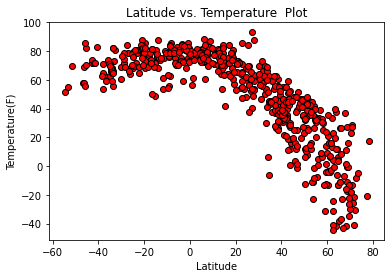

In [8]:
plt.scatter(clean_cities_df['Latitude'], clean_cities_df['Max Temp (F)'], marker="o", facecolors="red", edgecolors="black")
plt.title('Latitude vs. Temperature  Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity(%)')

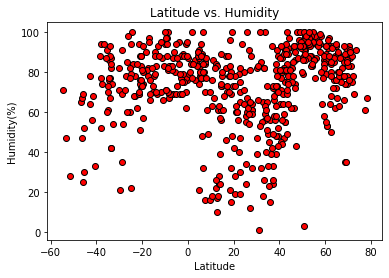

In [9]:
plt.scatter(clean_cities_df['Latitude'], clean_cities_df['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

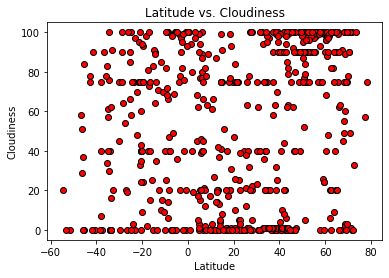

In [10]:
plt.scatter(clean_cities_df['Latitude'], clean_cities_df['Cloudiness'], marker="o", facecolors="red", edgecolors="black")
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

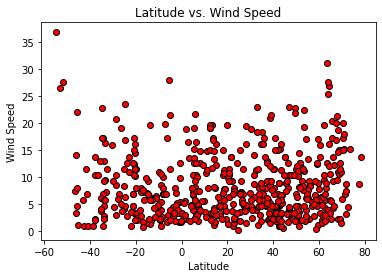

In [11]:
plt.scatter(clean_cities_df['Latitude'], clean_cities_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black")
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## Linear Regression

In [14]:
#Create two Data Frames based on Northern and Southern Hemisphere
northern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] >= 0)]
southern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] < 0)]
southern_hemisphere_cities_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
1,airai,-8.9266,125.4092,62.98,100,100,3.83,TL,1612481396
4,hobart,-42.8794,147.3294,71.60,78,75,5.75,AU,1612481310
6,mataura,-46.1927,168.8643,68.94,47,51,3.42,NZ,1612481406
9,rikitea,-23.1203,-134.9692,78.85,68,97,10.94,PF,1612481114
12,busselton,-33.6500,115.3333,55.99,82,0,16.37,AU,1612481411


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(5, -40, 'y = -1.35x + 91.64')

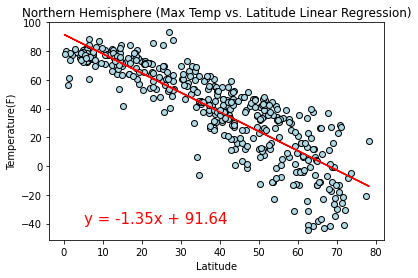

In [31]:
#Scatter Plot
plt.scatter(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Max Temp (F)'], marker="o", facecolors="lightblue", edgecolors="black")
plt.title('Northern Hemisphere (Max Temp vs. Latitude Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')

#Linear Regression
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Max Temp (F)'])
regress_values1 = northern_hemisphere_cities_df['Latitude'] * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(northern_hemisphere_cities_df['Latitude'],regress_values1,"r-")
plt.annotate(line_eq1,(5,-40),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-40, 50, 'y = -1.35x + 91.64')

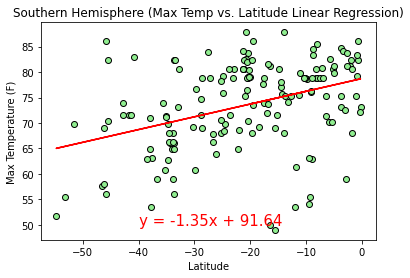

In [30]:
#Scatter Plot
plt.scatter(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Max Temp (F)'], marker="o", facecolors="lightgreen", edgecolors="black")
plt.title('Southern Hemisphere (Max Temp vs. Latitude Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Linear Regression
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Max Temp (F)'])
regress_values2 = southern_hemisphere_cities_df['Latitude'] * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
plt.plot(southern_hemisphere_cities_df['Latitude'],regress_values2,"r-")
plt.annotate(line_eq1,(-40,50),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(40, 15, 'y = 0.31x + 60.92')

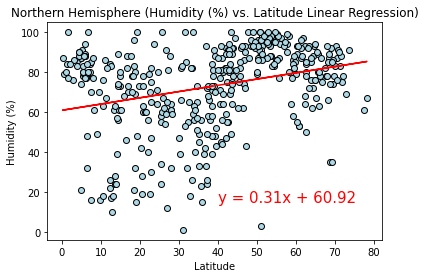

In [29]:
#Scatter Plot
plt.scatter(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Humidity'], marker="o", facecolors="lightblue", edgecolors="black")
plt.title('Northern Hemisphere (Humidity (%) vs. Latitude Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Linear Regression
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Humidity'])
regress_values3 = northern_hemisphere_cities_df['Latitude'] * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
plt.plot(northern_hemisphere_cities_df['Latitude'],regress_values3,"r-")
plt.annotate(line_eq3,(40,15),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-25, 30, 'y = 0.5x + 85.87')

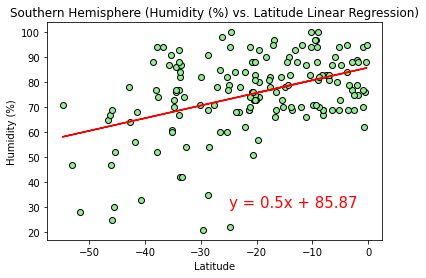

In [35]:
#Scatter Plot
plt.scatter(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Humidity'], marker="o", facecolors="lightgreen", edgecolors="black")
plt.title('Southern Hemisphere (Humidity (%) vs. Latitude Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Linear Regression
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Humidity'])
regress_values4 = southern_hemisphere_cities_df['Latitude'] * slope4 + intercept4
line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))
plt.plot(southern_hemisphere_cities_df['Latitude'],regress_values4,"r-")
plt.annotate(line_eq4,(-25,30),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [77]:
def southern_scatter_linear(x_axis, y_axis, a, b):
    #First argument is x axis, second is y axis, third one is to determine color and fourth to determine hemisphere.
    #Scatter Plot
    hemisphere = ['Northern Hemisphere ', 'Southern Hemisphere ']
    colors = ['lightblue', 'lightgreen']
    plt.scatter(x_axis, y_axis, marker="o", facecolors=colors[a], edgecolors="black")
    plt.title(f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression)")
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)

    #Linear Regression
    x = x_axis.mean() 
    y = y_axis.min()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

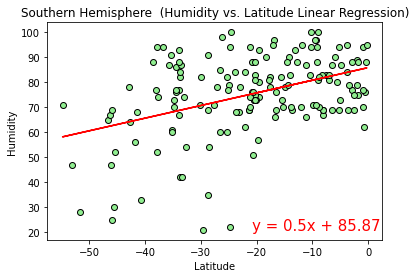

In [79]:
southern_scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Humidity'], 1, 1)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [65]:
southern_hemisphere_cities_df['Latitude'].name

'Latitude'

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression